# Python for Data Science, Level I
### *Session \#8*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Timeseries Data
---

### Warm Ups

In [92]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

url = "https://www.quandl.com/api/v3/datasets/EOD/AAPL.csv"
query_string = "?api_key=K2km7t6m9xhmYRD7zCPY"

**Read CSV of timeseries data:**
```python
df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')
```

In [93]:
df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')

**Sort rows by date:** `df.sort_values('Date', inplace=True)`

In [94]:
df.sort_values('Date', inplace=True)

**Grab year/month/day of data with partial string index:** 
```python
df.loc['2017']
df.loc['2017-02']
df.loc['2017-02-01']
```

**Grab slice with partial string index:** `df.loc['2017-01':'2017-03']`

**Get monthly average:** `df.resample('M').mean()`

### Exercises
---
**1. What was the average closing price during 2014?**

In [ ]:
df.loc['2014']['Close'].mean()

**2. What was the highest stock price during Jan - Mar of 2015?**

In [53]:
df.loc['2015-01':'2015-03']['High'].max()

133.6

**3. What was the lowest closing price of AAPL in 2015? When did the lowest closing price occur?**
Hint: You can use the Numpy function `.idxmin()` to find the index of the min argument, and likewise for `.idxmax()`

In [56]:
df.loc['2015']['Close'].idxmin()

Timestamp('2015-08-24 00:00:00')

**4. Create a new column called** `Change in Dollars` **that tracks difference between** `Close` **and** `Open`

**What day saw the biggest gain in terms of dollars?**

In [99]:
df['Change in Dollars'] = df['Close'] - df['Open']

df["Change in Dollars"].idxmax()

Timestamp('2014-04-28 00:00:00')

**5. Use** `.resample()` **to find the top 3 weeks in terms of AAPL's average** `Close` **price**



In [74]:
weekly = df.resample('W').mean()
weekly['Close'].sort_values(ascending=False)[:3]

Date
2014-06-08    640.786
2014-06-01    629.505
2014-05-25    607.402
Name: Close, dtype: float64

### Extra Credit

---


**Create a new column for the percentage change from** `Open` **to** `Close` **for each day. What day saw AAPL's largest gain, percentage-wise?**

Hint: Divide `Change in Dollars` by `Open` to find relative change.

In [78]:
df['Change in Percent'] = 100* df['Change in Dollars'] / df['Open']

df['Change in Percent'].idxmax()

Timestamp('2015-08-24 00:00:00')

## II. Intro to Matplotlib

### Warm Ups

---

*Note: Use **ONE** notebook cell per graph*

*Note: Executing things in order matters!*

*Note: This page lists [all base styles](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) supported by Matplotlib.* 

In [104]:
# CHOOSE STYLE (ONCE PER NOTEBOOK)
# plt.style.use('seaborn')



# SET SIZE OF GRAPH (INCHES)
# plt.figure(figsize=(12,6))



# DRAW PLOT
# plt.plot(df['Open'])



# ADD LEGEND TO PLOT (OPTIONAL: LIST OF STRINGS FOR LABELS)
# plt.legend()



# SAVE PLOT TO HARDDRIVE
# plt.savefig("example.jpg")

### Exercises
---
**1. Choose a different style and plot the** `Close` **column over December of 2016**

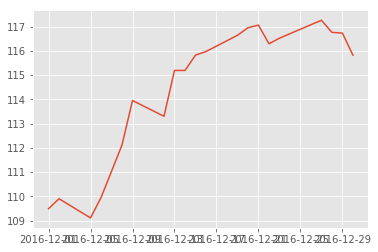

In [108]:
plt.style.use('ggplot')

plt.plot(df.loc['2016-12', 'Close'])

**2. The second input to** `plt.plot()` **can be a dataframe as well.**

**Create a new dataframe with just the** `High` **and** `Low` **columns and plot this over January 2015.** 

**Add a legend, with the labels** `Highest Price` **and** `Lowest Price` 

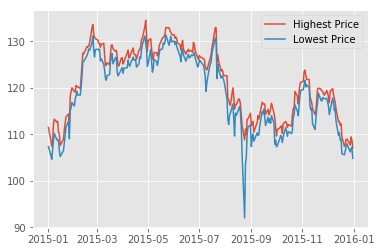

In [109]:
columns = ['High', 'Low']

plt.plot(df.loc['2015', columns])
plt.legend(['Highest Price', 'Lowest Price'])

**3. Create a new** `Variation` **column which captures the difference between** `High` **and** `Low` **as a positive number, i.e. absolute value.**

*Hint: To get absolute value, use Numpy array's .abs() method*

In [88]:
df['Variation'] = (df['High'] - df['Low']).abs()

**4. Call** `plt.hist()` **on your new column to create a histogram, which shows how frequently values occur.**

**The** `.hist()` **method takes a** `bins` **parameter which controls how many bars your histogram will have.**

(array([482., 288.,  97.,  52.,  36.,  32.,  35.,  26.,  12.,  13.,   8.,
          3.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   1.]),
 array([ 0.58  ,  1.7865,  2.993 ,  4.1995,  5.406 ,  6.6125,  7.819 ,
         9.0255, 10.232 , 11.4385, 12.645 , 13.8515, 15.058 , 16.2645,
        17.471 , 18.6775, 19.884 , 21.0905, 22.297 , 23.5035, 24.71  ]),
 <a list of 20 Patch objects>)

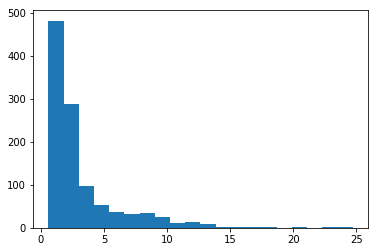

In [87]:
plt.hist(df['Variation'], bins=20)

**5. Do a groupby on** `df.index.month` **to total up volume per month. Save the output dataframe as** `volume`

In [7]:
volume = df.groupby(df.index.month)['Volume'].sum()

## III. More Matplotlib

### Warm Ups

---

*NOTE: Can set `fontsize` and `fontname` on any of these methods*

([<matplotlib.axis.XTick at 0x11ab5d5c0>,
 <a list of 12 Text xticklabel objects>)

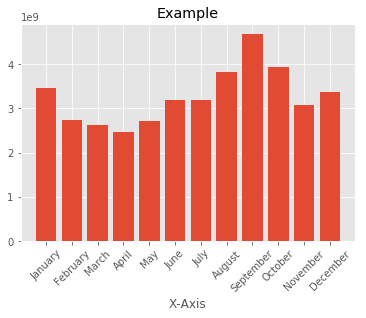

In [120]:
# IMPORT PACKAGE TO HELP WITH MONTH/DAY NAMES
# import calendar
# months = calendar.month_name[1:]
# days = calendar.day_name

# CREATE BAR CHART 
# plt.bar(volume.index, volume)
plt.bar(volume.index, volume)

# ADD TITLE
# plt.title('Example')
plt.title('Example')

# CHANGE X-AXIS LABEL
# plt.xlabel("X-Axis")
plt.xlabel('X-Axis')

# CHANGE TICK LABELS 
# plt.xticks(volume.index, months, rotation=90)
plt.xticks(volume.index, months, rotation=45)

### Exercises
---

**1. Create a bar graph of** `volume` **with proper title, figure size, and y-axis label** 

Text(0, 0.5, '100s of Millions of Transactions')

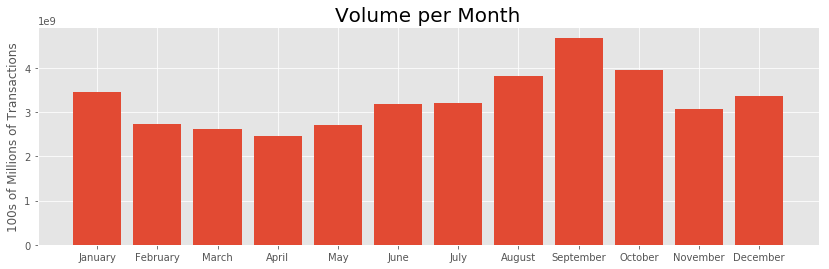

In [71]:
plt.figure(figsize=(14, 4))
plt.bar(volume.index, volume)
plt.xticks(volume.index, labels=calendar.month_name[1:])
plt.title('Volume per Month', fontsize=20)
plt.ylabel("100s of Millions of Transactions")

**2. Create a dataframe named** `monthly_change` **by grouping** `df` **by** `df.index.month` **and summing up the** `Change` **column**

([<matplotlib.axis.XTick at 0x117d96080>,
 <a list of 12 Text xticklabel objects>)

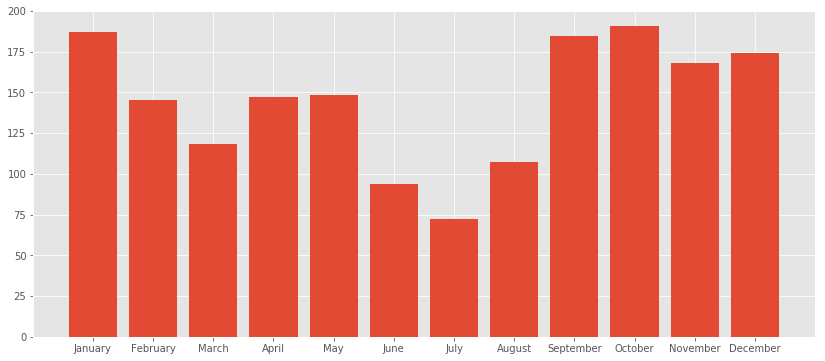

In [72]:
plt.figure(figsize=(14, 6))
monthly_change = df.groupby(df.index.month)['Absolute Change'].sum()
plt.bar(monthly_change.index, monthly_change)
plt.xticks(monthly_change.index, months)

**3. Create a dataframe named** `daily_volume` **by grouping** `df` **by** `df.index.dayofweek` **and summing up the** `Volume` **column.**

**Use** `plt.barh()` **to plot it as a horizontal bar chart, and** `plt.yticks()` **to label the y-axis**

([<matplotlib.axis.YTick at 0x10823b240>,
 <a list of 5 Text yticklabel objects>)

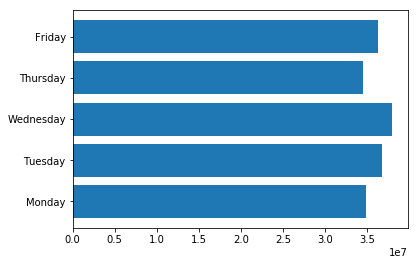

In [11]:
week_volume = df.groupby(df.index.dayofweek)['Volume'].mean()
plt.barh(week_volume.index, week_volume)
plt.yticks(week_volume.index, calendar.day_name)

### Extra Credit

---

**At the top of this Jupyter notebook, we used a url that ended in** `AAPL.csv`

**If we use another stock symbol like** `FB.csv` **we will receive data for Facebook instead of Apple**

**Create a reusable function that will graph whatever stock symbol you pass in.**

Note: Here are some symbols to try -- GS, FB, GOOG, TSLA. Not all stock symbols are available from Quandl.

In [117]:
def graph_stock(symbol, start, end):
    url = f"https://www.quandl.com/api/v3/datasets/EOD/{symbol}.csv"
    query_string = "?api_key=K2km7t6m9xhmYRD7zCPY"
    df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')
    df.sort_values('Date', inplace=True)
    plt.figure(figsize=(12, 6))
    plt.plot(df.loc[start:end]['Close'])
    plt.title(f"{symbol} price from {start} to {end}")
    plt.xticks(rotation=45)

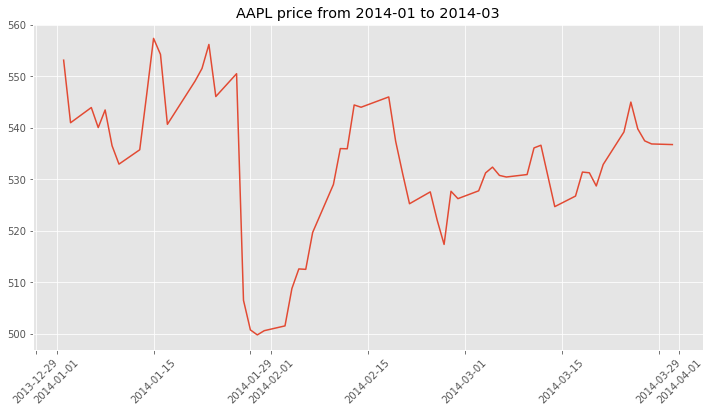

In [118]:
graph_stock('AAPL', '2014-01', '2014-03')